# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [11]:
# dict for title/res path pair 
# running on ws3
# 2025-06-27 first run

pegasus = {
	"add":
		"/workspace/code/logs/3dcnn_attn_map_True_add/2025-06-21/13-28-55/best_preds",
	"mul":
		"/workspace/code/logs/3dcnn_attn_map_True_mul/2025-06-21/13-28-55/best_preds",
	"concat":
		"/workspace/code/logs/3dcnn_attn_map_True_concat/2025-06-24/09-12-09/best_preds",
	"avg":
		"/workspace/code/logs/3dcnn_attn_map_True_avg/2025-06-24/09-12-09/best_preds",
	"late":
		"/workspace/code/logs/3dcnn_attn_map_True_late/2025-06-24/09-12-09/best_preds",
	"none":
		"/workspace/code/logs/3dcnn_attn_map_True_none/2025-06-24/09-12-09/best_preds",
}



****************************************************************************************************
pegasus, add
fold: 5
****************************************************************************************************
add
accuracy: tensor(0.7232)
precision: tensor(0.7650)
recall: tensor(0.7232)
f1_score: tensor(0.7227)
aurroc: tensor(0.8965)
_confusion_matrix: tensor([[0.7741, 0.0631, 0.1628],
        [0.4028, 0.4764, 0.1207],
        [0.0722, 0.0088, 0.9190]])
####################################################################################################


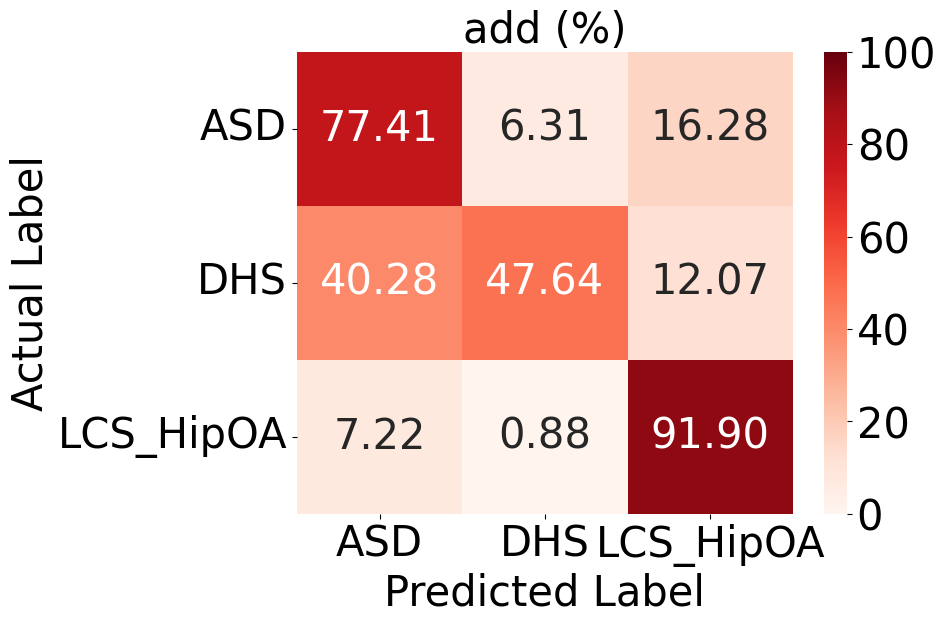

****************************************************************************************************
pegasus, mul
fold: 5
****************************************************************************************************
mul
accuracy: tensor(0.5814)
precision: tensor(0.6751)
recall: tensor(0.5814)
f1_score: tensor(0.5748)
aurroc: tensor(0.7895)
_confusion_matrix: tensor([[0.7066, 0.0225, 0.2710],
        [0.3836, 0.3065, 0.3100],
        [0.2583, 0.0106, 0.7311]])
####################################################################################################


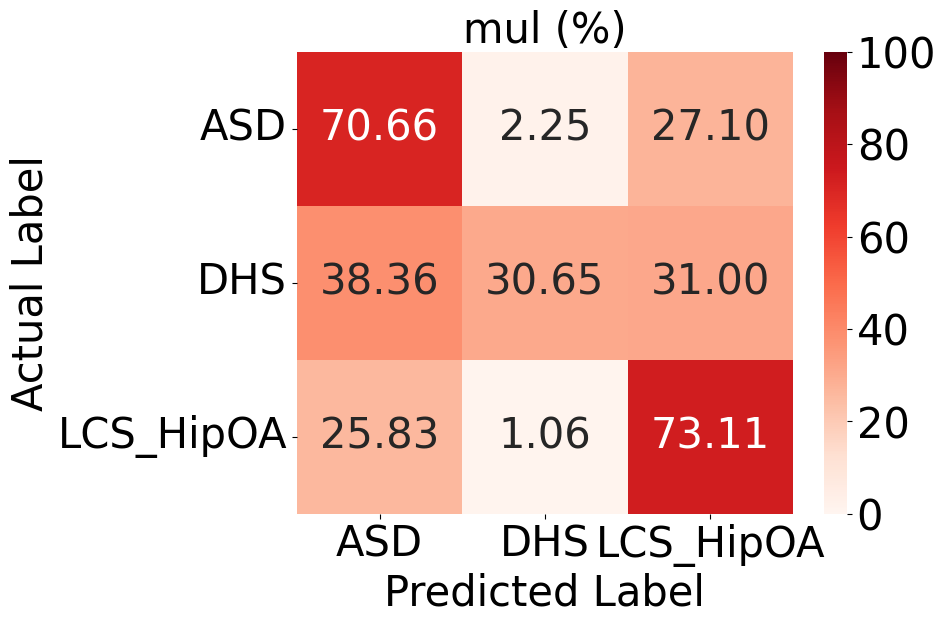

****************************************************************************************************
pegasus, concat
fold: 5
****************************************************************************************************
concat
accuracy: tensor(0.7201)
precision: tensor(0.7367)
recall: tensor(0.7201)
f1_score: tensor(0.7121)
aurroc: tensor(0.8669)
_confusion_matrix: tensor([[0.8217, 0.1553, 0.0230],
        [0.2599, 0.7043, 0.0358],
        [0.2593, 0.1064, 0.6342]])
####################################################################################################


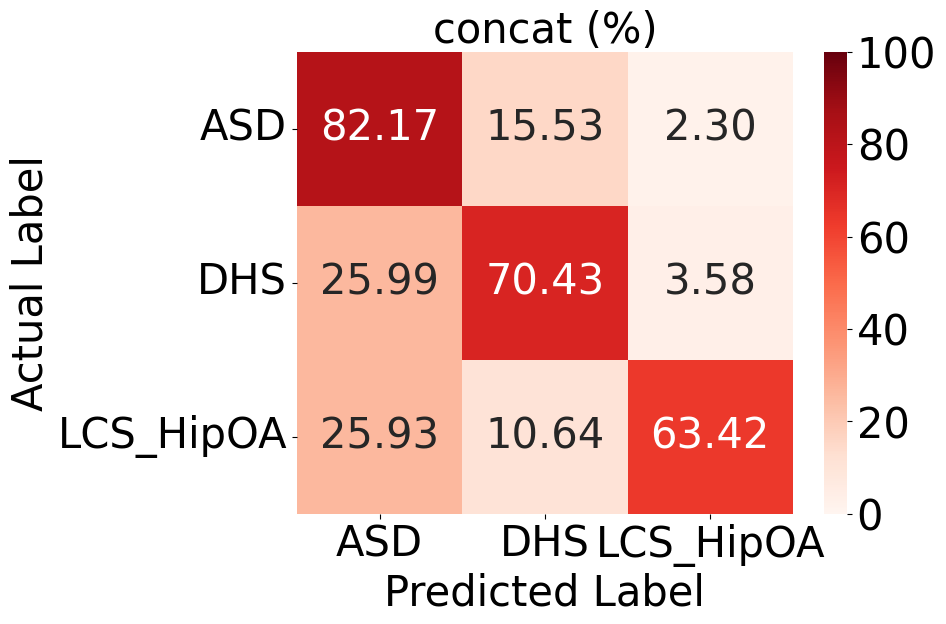

****************************************************************************************************
pegasus, avg
fold: 5
****************************************************************************************************
avg
accuracy: tensor(0.7281)
precision: tensor(0.7273)
recall: tensor(0.7281)
f1_score: tensor(0.7258)
aurroc: tensor(0.8535)
_confusion_matrix: tensor([[0.7275, 0.2049, 0.0676],
        [0.2228, 0.6899, 0.0873],
        [0.1268, 0.1063, 0.7669]])
####################################################################################################


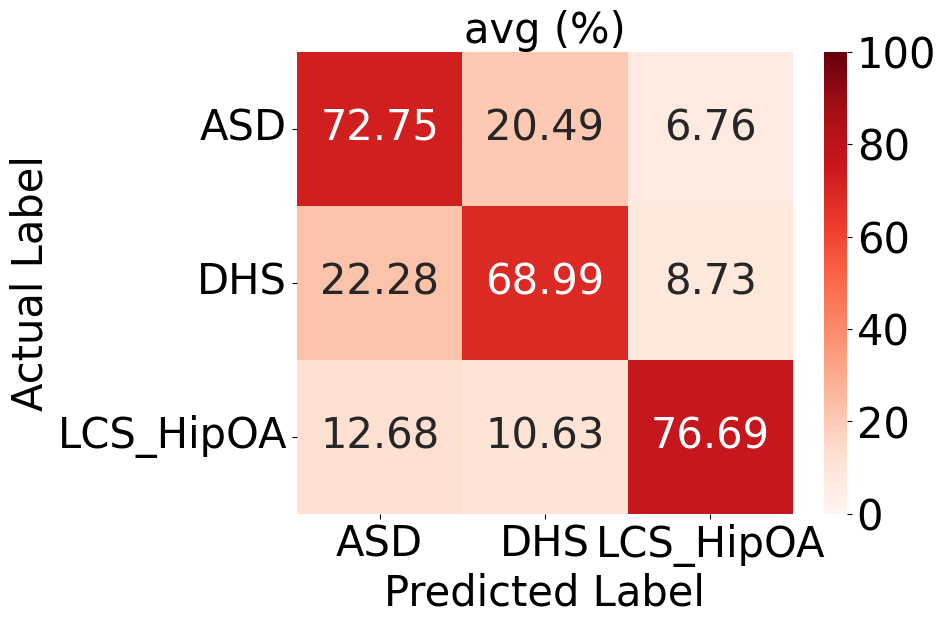

****************************************************************************************************
pegasus, late
fold: 5
****************************************************************************************************
late
accuracy: tensor(0.6842)
precision: tensor(0.7059)
recall: tensor(0.6842)
f1_score: tensor(0.6807)
aurroc: tensor(0.8636)
_confusion_matrix: tensor([[0.8167, 0.1102, 0.0731],
        [0.3802, 0.5543, 0.0654],
        [0.2285, 0.0900, 0.6815]])
####################################################################################################


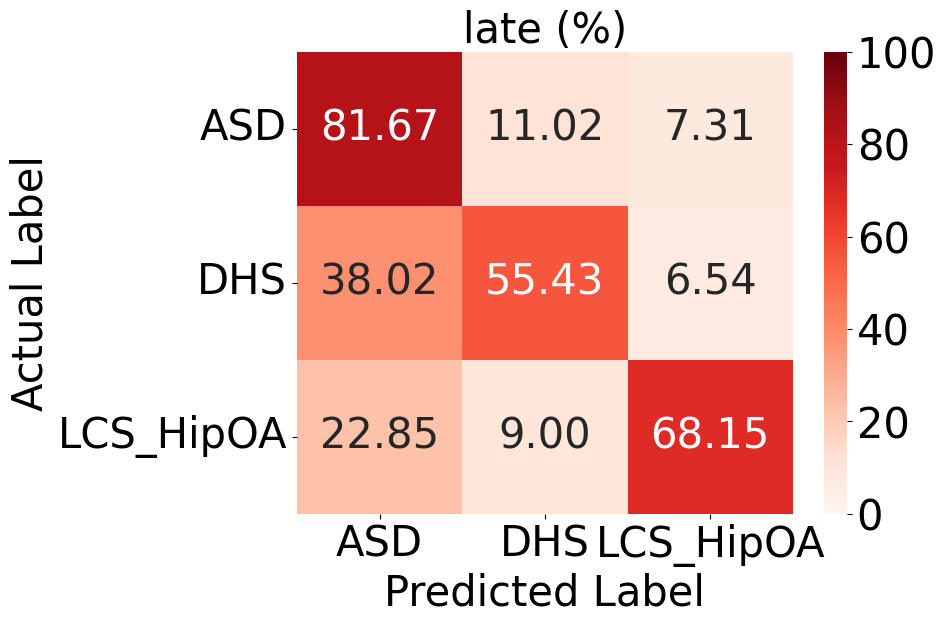

****************************************************************************************************
pegasus, none
fold: 5
****************************************************************************************************
none
accuracy: tensor(0.7468)
precision: tensor(0.7427)
recall: tensor(0.7468)
f1_score: tensor(0.7425)
aurroc: tensor(0.8949)
_confusion_matrix: tensor([[0.7443, 0.1279, 0.1278],
        [0.1568, 0.7742, 0.0690],
        [0.1783, 0.0998, 0.7219]])
####################################################################################################


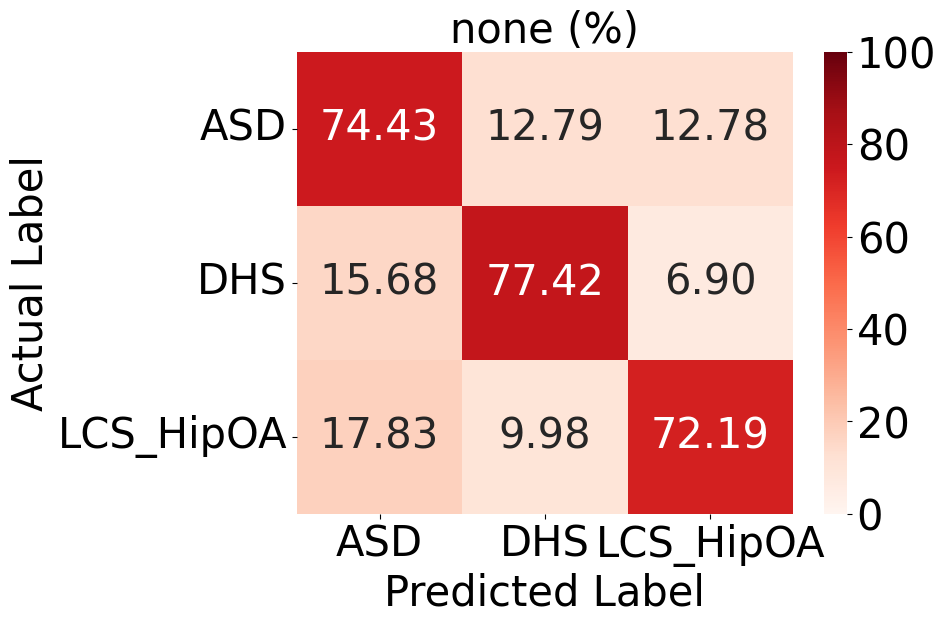

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
from pathlib import Path

from torchmetrics.classification import (
MulticlassAccuracy,
MulticlassPrecision,
MulticlassRecall,
MulticlassF1Score,
MulticlassConfusionMatrix,
MulticlassAUROC,
)

# analysis with title/res path pair

def analysis_with_title_res_path_pair(pair: dict, flag: str = "with_attn_loss"):

	for title, res_path in pair.items():
		
		fold = 0
		print('*' * 100)
		print(f"{flag}, {title}")
		all_label = []
		all_pred = []
		
		fold = int(len(list(Path(res_path).iterdir())) / 2 )

		print(f"fold: {fold}")

		for i in range(fold):
			label = torch.load(f"{res_path}/{i}_label.pt", map_location="cpu").to(torch.int)
			pred = torch.load(f"{res_path}/{i}_pred.pt", map_location="cpu")
			all_label.append(label)
			all_pred.append(pred)

		all_label = torch.cat(all_label, dim=0)
		all_pred = torch.cat(all_pred, dim=0)
		
		print('*' * 100)
		print(title)
		confusion_matrix_data = metrics(all_pred, all_label, num_class=3)
		print('#' * 100)

		plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})
		axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

		# draw confusion matrix
		plt.figure(figsize=(8, 6))
		sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
		# plt.title(f'{title} (%)', fontsize=30)
		plt.title(f"{title} (%)", fontsize=30)
		plt.ylabel('Actual Label', fontsize=30)
		plt.xlabel('Predicted Label', fontsize=30)
		plt.show()
    	

def metrics(all_pred: torch.Tensor, all_label: torch.Tensor, num_class: int = 3):

	# define metrics 
	_accuracy = MulticlassAccuracy(num_class)
	_precision = MulticlassPrecision(num_class)
	_recall = MulticlassRecall(num_class)
	_f1_score = MulticlassF1Score(num_class)
	_auroc = MulticlassAUROC(num_class)
	_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

	print('accuracy: %s' % _accuracy(all_pred, all_label))
	print('precision: %s' % _precision(all_pred, all_label))
	print('recall: %s' % _recall(all_pred, all_label))
	print('f1_score: %s' % _f1_score(all_pred, all_label))
	print('aurroc: %s' % _auroc(all_pred, all_label))
	print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))

	return _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

analysis_with_title_res_path_pair(pegasus, flag="pegasus")